In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [24]:
def tolerance_plot(f_p, f_s, gpass, gstop, w, mag):
    max_freq = max(f_p, f_s)
    if max_freq >= 1e9:
        scale = 1e9
        unit = 'GHz'
    elif max_freq >= 1e6:
        scale = 1e6
        unit = 'MHz'
    elif max_freq >= 1e3:
        scale = 1e3
        unit = 'kHz'
    else:
        scale = 1
        unit = 'Hz'
    
    # Normalize the frequencies for plotting
    f_p_norm = f_p / scale
    f_s_norm = f_s / scale
    w_norm = w / scale

    plt.semilogx(w_norm/(2*np.pi), mag, linewidth=3)
    # Add shaded regions for passband, transition band, and stopband
    plt.fill_betweenx([0, -gpass], 1e-1 * f_p_norm, f_p_norm, color='lightgreen', alpha=0.5, label='Passband')
    plt.fill_betweenx([-gpass, -gstop], f_p_norm, f_s_norm, color='lightgrey', alpha=0.5, label='Transition Band')
    plt.fill_betweenx([-gstop, -40], f_s_norm, 1e1 * f_s_norm, color='lightcoral', alpha=0.5, label='Stopband')

    # Add limited length horizontal and vertical lines for gpass and gstop
    plt.plot([1e-1 * f_p_norm, f_p_norm], [-gpass, -gpass], 'g--', label=f'-{gpass} dB', linewidth=2)
    plt.plot([f_s_norm, 1e1 * f_s_norm], [-gstop, -gstop], 'r--', label=f'-{gstop} dB', linewidth=2)
    plt.plot([f_p_norm, f_p_norm], [-gpass, -gstop], 'k--', label=f'Passband edge: {f_p_norm/1e3} kHz', linewidth=2)
    plt.plot([f_s_norm, f_s_norm], [-gpass, -gstop], 'k--', label=f'Stopband edge: {f_s_norm/1e3} kHz', linewidth=2)

    # Set custom x and y ticks
    min_order = np.floor(np.log10(1e-1 * f_p_norm))
    max_order = np.ceil(np.log10(1e1 * f_s_norm))
    xticks = np.logspace(min_order, max_order, num=int(max_order - min_order + 1))
    xticks = np.unique(np.append(xticks, [f_p_norm, f_s_norm]))
    xtick_labels = [f'{int(tick)}' for tick in xticks]
    plt.xticks(xticks, xtick_labels)
    plt.yticks([-40, -gstop, -20, -10, -gpass, 0], ['-40', str(-gstop), '-20', '-10', str(-gpass), '0'])

    ax = plt.gca()
    xticks = ax.get_xticklabels()
    yticks = ax.get_yticklabels()

    for label in xticks:
        if label.get_text() == str(int(f_p_norm)):
            label.set_color('green')
            label.set_fontweight('bold')
        if label.get_text() == str(int(f_s_norm)):
            label.set_color('red')
            label.set_fontweight('bold')

    for label in yticks:
        if label.get_text() == str(-gpass):
            label.set_color('green')
            label.set_fontweight('bold')
        if label.get_text() == str(-gstop):
            label.set_color('red')
            label.set_fontweight('bold')
    
    plt.ylim(-40, 3)
    plt.xlim(1e-1*f_p_norm, 1e1*f_s_norm)
    plt.xlabel(f'Frequency [{unit}]')
    plt.ylabel('Gain [dB]')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

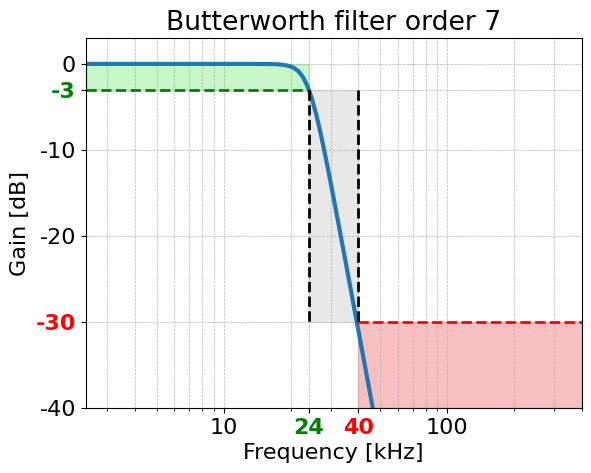

In [27]:
f_p, f_s = 24e3, 40e3
w_p, w_s = 2*np.pi*f_p, 2*np.pi*f_s
gpass, gstop = 3, 30

n, w_p = signal.buttord(w_p, 2*np.pi*f_s, gpass, gstop, analog=True)
b,a = signal.butter(n, w_p, analog=True)
w, mag, phase = signal.bode(signal.TransferFunction(b, a))

tolerance_plot(f_p, f_s, gpass, gstop, w, mag)
plt.title(f'Butterworth filter order {n}');

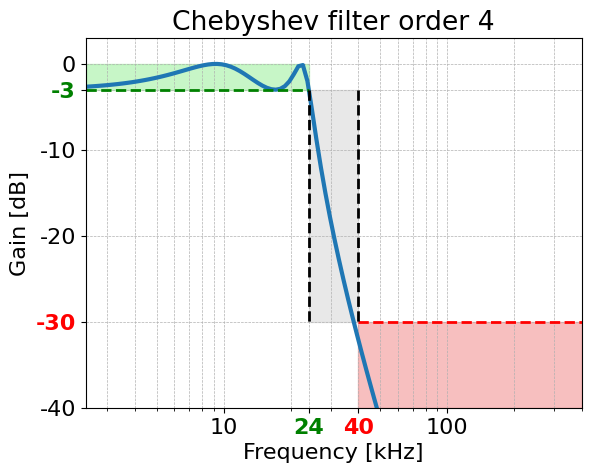

In [28]:
f_p, f_s = 24e3, 40e3
w_p, w_s = 2*np.pi*f_p, 2*np.pi*f_s
gpass, gstop = 3, 30

n, w_p = signal.cheb1ord(w_p, 2*np.pi*f_s, gpass, gstop, analog=True)
b,a = signal.cheby1(n, gpass, w_p, analog=True)
w, mag, phase = signal.bode(signal.TransferFunction(b, a))

tolerance_plot(f_p, f_s, gpass, gstop, w, mag)
plt.title(f'Chebyshev filter order {n}');